## Red wine quality classifier using a Neural network

In [988]:
#Import required libraries::
import pandas as pd 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

### Perform EDA, Explore the features using histograms, any data preprocessing required:::

In [989]:
redWineData = pd.read_csv("./Data/winequality-red.csv")

In [990]:
redWineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [991]:
redWineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [992]:
redWineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [993]:
redWineData.shape

(1599, 12)

In [994]:
redWineData.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

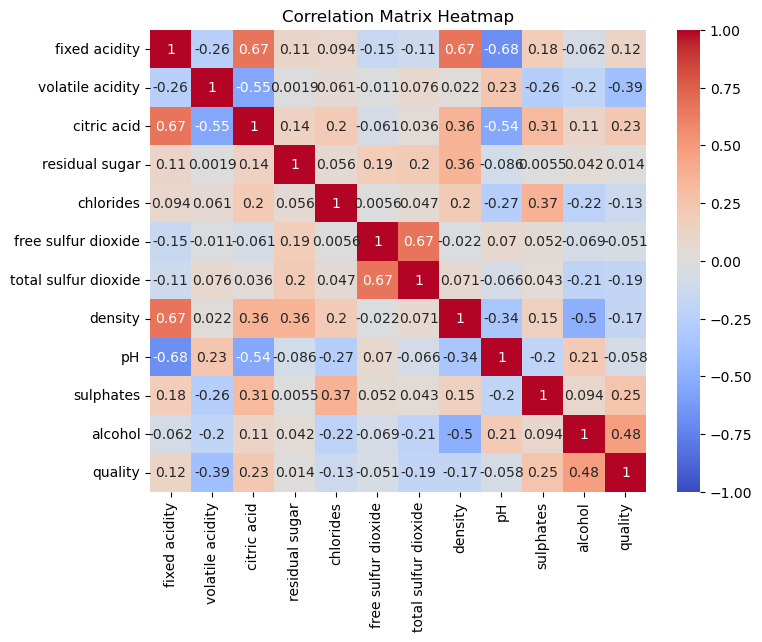

In [995]:
correlationCalc = redWineData.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlationCalc, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [996]:
redWineData.drop(["pH","density", "citric acid"], inplace= True, axis=1)
redWineData.head(5)

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,1.9,0.076,11.0,34.0,0.56,9.4,5
1,7.8,0.88,2.6,0.098,25.0,67.0,0.68,9.8,5
2,7.8,0.76,2.3,0.092,15.0,54.0,0.65,9.8,5
3,11.2,0.28,1.9,0.075,17.0,60.0,0.58,9.8,6
4,7.4,0.70,1.9,0.076,11.0,34.0,0.56,9.4,5


In [997]:
redWineData.columns = redWineData.columns.str.replace(' ', '_')

In [998]:
redWineData["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [999]:
encoder = LabelEncoder()
redWineData['quality'] = encoder.fit_transform(redWineData['quality'])

In [1000]:
redWineData["quality"].unique()

array([2, 3, 4, 1, 5, 0], dtype=int64)

In [1001]:
target = redWineData["quality"]
features = redWineData.drop(["quality"], axis=1)

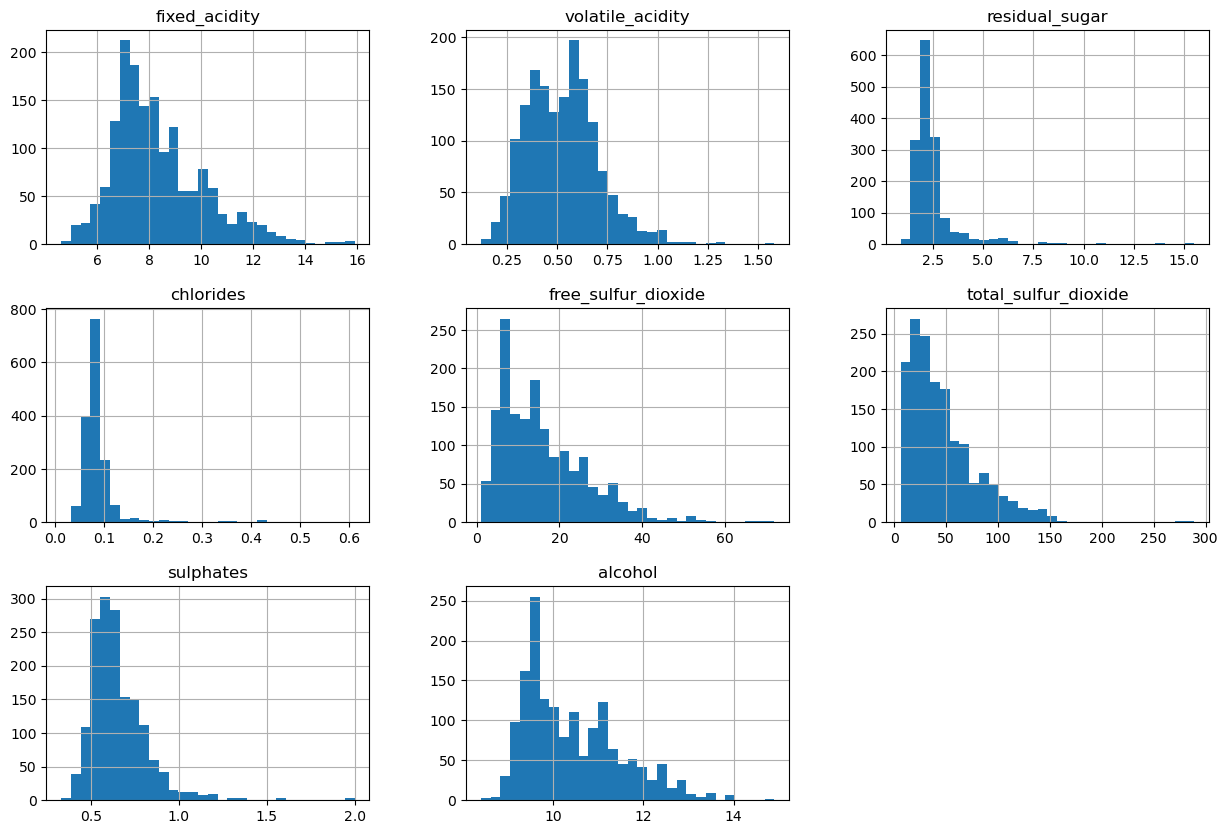

In [1002]:
features.hist(bins=30, figsize=(15, 10))
plt.show()

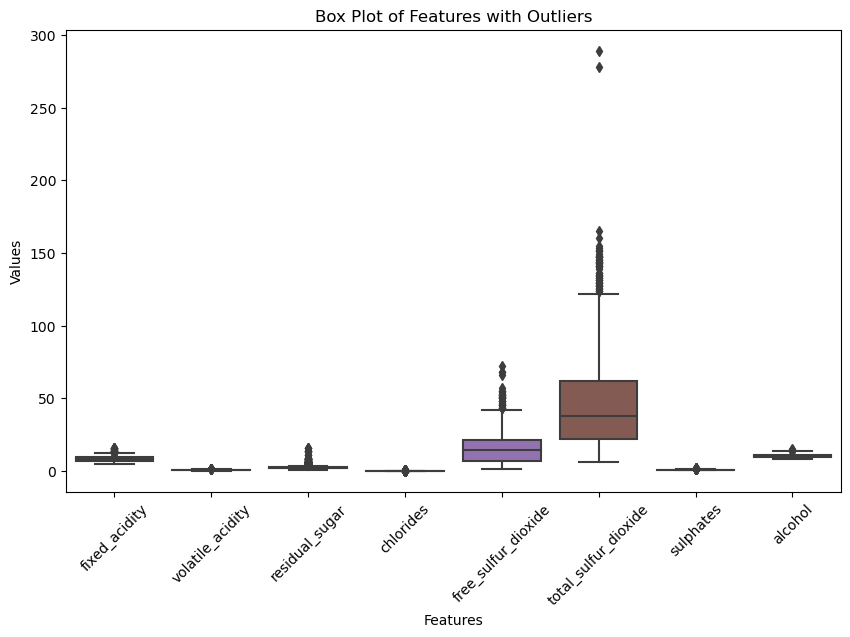

In [1003]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=features)
plt.title('Box Plot of Features with Outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [1004]:
z_scores = zscore(features["total_sulfur_dioxide"])
features["total_sulfur_dioxide"] = np.where(np.abs(z_scores) > 3, np.nan, features["total_sulfur_dioxide"])
features["total_sulfur_dioxide"].fillna(features["total_sulfur_dioxide"].median(), inplace=True)

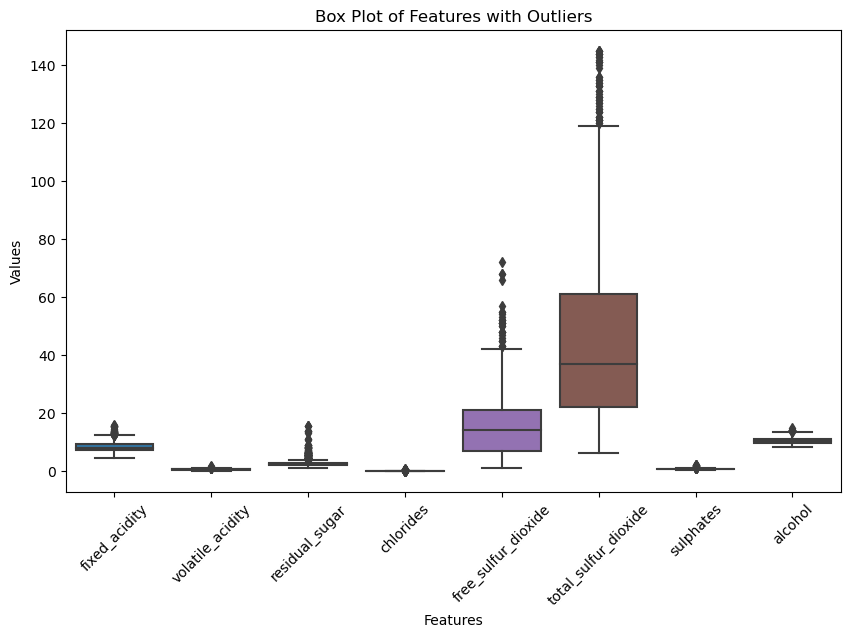

In [1005]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=features)
plt.title('Box Plot of Features with Outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [1006]:
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

In [1007]:
# onehot_encoder = OneHotEncoder(sparse_output=False, categories='auto')
# y_train = onehot_encoder.fit_transform(np.array(y_train).reshape(-1, 1))
# y_val = onehot_encoder.fit_transform(np.array(y_val).reshape(-1, 1))

### NN using Tensorflow Estimator DNN Classifier implementation:::

In [1008]:
# Define input functions
train_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_train,
    y=y_train,
    batch_size=32,
    num_epochs=None,
    shuffle=True)

eval_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_val,
    y=y_val,
    batch_size=32,
    num_epochs=1,
    shuffle=False)

In [1009]:
# Define feature columns
feature_columns = []
for feature_name in features.columns:
    feature_columns.append(tf.feature_column.numeric_column(feature_name.replace(' ', '_'), dtype=tf.float32))

# Define the model
model = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[10, 20, 10],
    n_classes=6)

# Train the model
steps = 25
dnn_history = {'accuracy': [], 'val_accuracy': [], 'loss': [], 'val_loss': []}
for i in range(steps):
    print(f"Running for the {i} step")
    model.train(input_fn=train_input_fn, steps=1)
    eval_result = model.evaluate(input_fn=eval_input_fn)
    dnn_history['accuracy'].append(eval_result['accuracy'])
    dnn_history['val_accuracy'].append(eval_result['accuracy'])
    dnn_history['loss'].append(eval_result['loss'])
    dnn_history['val_loss'].append(eval_result['loss'])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\aacic\\AppData\\Local\\Temp\\tmp5rb5ixs4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Running for the 0 step
INFO:tensorflow:Calling

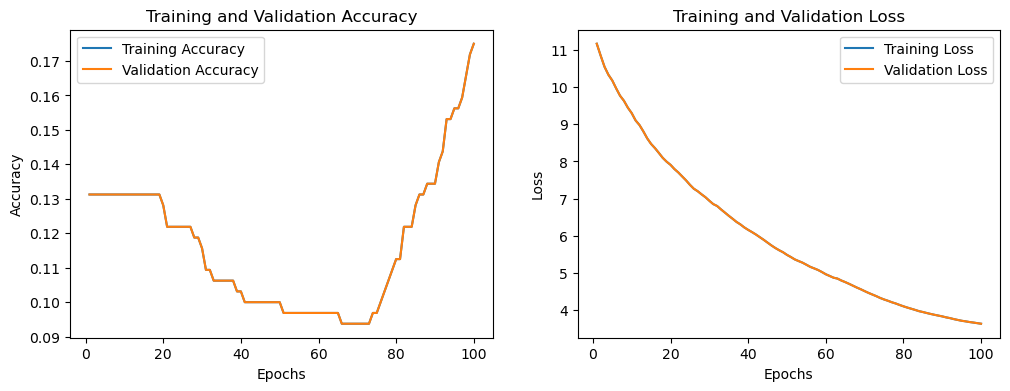

In [1010]:
# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, steps + 1), dnn_history['accuracy'], label='Training Accuracy')
plt.plot(range(1, steps + 1), dnn_history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, steps + 1), dnn_history['loss'], label='Training Loss')
plt.plot(range(1, steps + 1), dnn_history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### Neural Net using Keras implementation:::

In [1011]:
onehot_encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_train = onehot_encoder.fit_transform(np.array(y_train).reshape(-1, 1))
y_val = onehot_encoder.fit_transform(np.array(y_val).reshape(-1, 1))

In [1012]:
nNmodel = Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(6, activation='softmax')
    ])

nNmodel.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 128)               1152      
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dropout_25 (Dropout)        (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 16)                1040      
                                                                 
 dropout_26 (Dropout)        (None, 16)                0         
                                                                 
 dense_35 (Dense)            (None, 6)                

In [1013]:
# Compile the model
nNmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = nNmodel.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/25
40/40 [==============================] - 1s 5ms/step - loss: 1.6999 - accuracy: 0.3385 - val_loss: 1.3601 - val_accuracy: 0.3219
Epoch 2/25
40/40 [==============================] - 0s 2ms/step - loss: 1.3915 - accuracy: 0.3792 - val_loss: 1.2099 - val_accuracy: 0.4031
Epoch 3/25
40/40 [==============================] - 0s 2ms/step - loss: 1.3377 - accuracy: 0.4199 - val_loss: 1.1973 - val_accuracy: 0.4156
Epoch 4/25
40/40 [==============================] - 0s 2ms/step - loss: 1.2758 - accuracy: 0.4480 - val_loss: 1.1940 - val_accuracy: 0.4031
Epoch 5/25
40/40 [==============================] - 0s 2ms/step - loss: 1.2932 - accuracy: 0.4222 - val_loss: 1.1858 - val_accuracy: 0.4031
Epoch 6/25
40/40 [==============================] - 0s 2ms/step - loss: 1.2659 - accuracy: 0.4402 - val_loss: 1.1856 - val_accuracy: 0.4094
Epoch 7/25
40/40 [==============================] - 0s 2ms/step - loss: 1.2637 - accuracy: 0.4402 - val_loss: 1.1875 - val_accuracy: 0.4313
Epoch 8/25
40/40 [==

### Training & Validation Accuracy plots::::

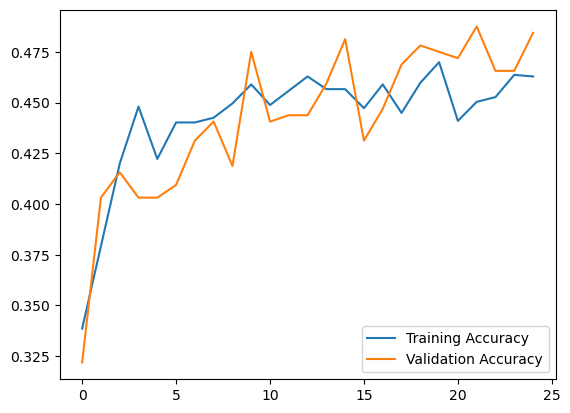

In [1014]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

### Training & Validation Loss plots:::

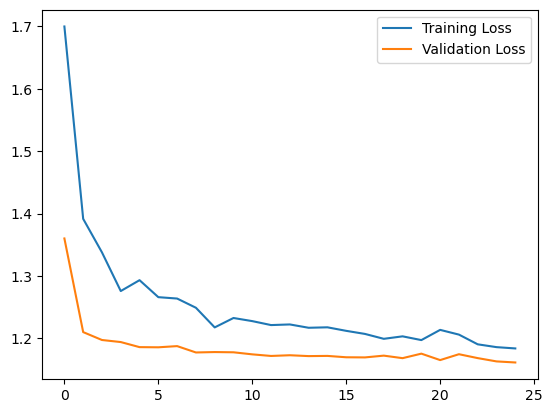

In [1015]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

### Conclusion:::